Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/212.5 MB 3.7 MB/s eta 0:00:57
   ---------------------------------------- 1.3/212.5 MB 3.6 MB/s eta 0:01:00
   ---------------------------------------- 1.8/212.5 MB 3.5 MB/s eta 0:01:01
   ---------------------------------------- 2.6/212.5 MB 3.4 MB/s eta 0:01:02
    --------------------------------------- 3.4/212.5 MB 3.4 MB/s eta 0:01:01
    --------------------------------------- 4.2/212.5 MB 3.4 MB/s eta 0:01:01
    --------------------------------------- 5.0/212.5 MB 3.4 MB/s eta 0:01:01
   - -------------------------------------- 5.5/212.5 MB 3.4 MB/s eta 0:01:01
   - -------------------------------------- 6.3/212.5 MB 3.4 MB/s eta 0:01:01
   - -------------------------------------- 7.1/212.5 MB 3.4 MB/s eta 0:01:01
   - -------------------------------------- 7.6/212.5 MB 3.4 MB/s eta 0

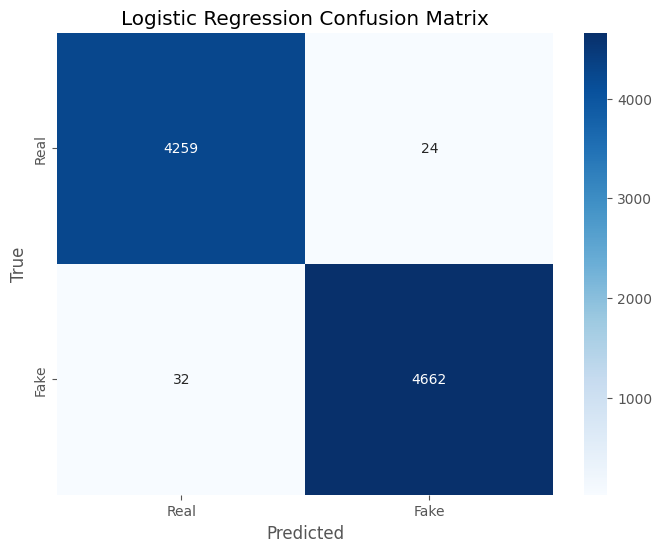


 Evaluating Random Forest

 Accuracy: 0.9977

 Classification Report:
              precision    recall  f1-score   support

           0     0.9967    0.9984    0.9976      4283
           1     0.9985    0.9970    0.9978      4694

    accuracy                         0.9977      8977
   macro avg     0.9976    0.9977    0.9977      8977
weighted avg     0.9977    0.9977    0.9977      8977



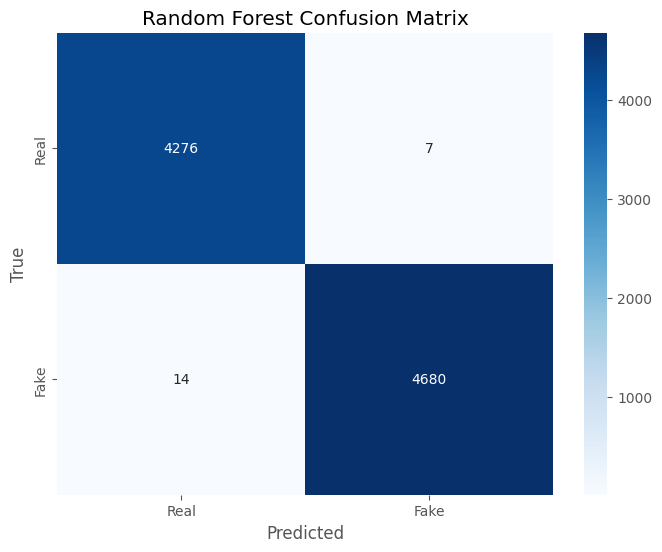

C:\Users\Abdelrahman Ahmed\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:31:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Evaluating XGBoost

 Accuracy: 0.9974

 Classification Report:
              precision    recall  f1-score   support

           0     0.9967    0.9979    0.9973      4283
           1     0.9981    0.9970    0.9975      4694

    accuracy                         0.9974      8977
   macro avg     0.9974    0.9975    0.9974      8977
weighted avg     0.9974    0.9974    0.9974      8977



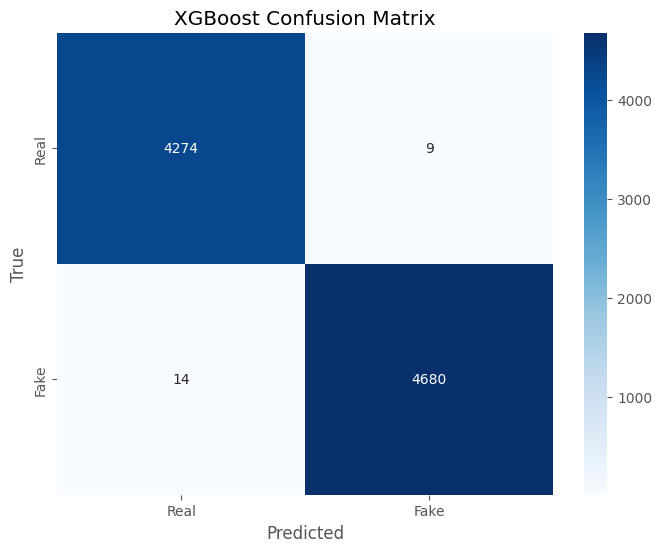


----------------------------------------
 Training Deep Learning Model with PyTorch
----------------------------------------
Training started...
Epoch 1 Loss: 54.3657
Epoch 2 Loss: 7.9042
Epoch 3 Loss: 2.8192
Epoch 4 Loss: 1.2417
Epoch 5 Loss: 0.4772

 Accuracy: 0.9923

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9918    0.9921    0.9919      4283
         1.0     0.9928    0.9925    0.9926      4694

    accuracy                         0.9923      8977
   macro avg     0.9923    0.9923    0.9923      8977
weighted avg     0.9923    0.9923    0.9923      8977



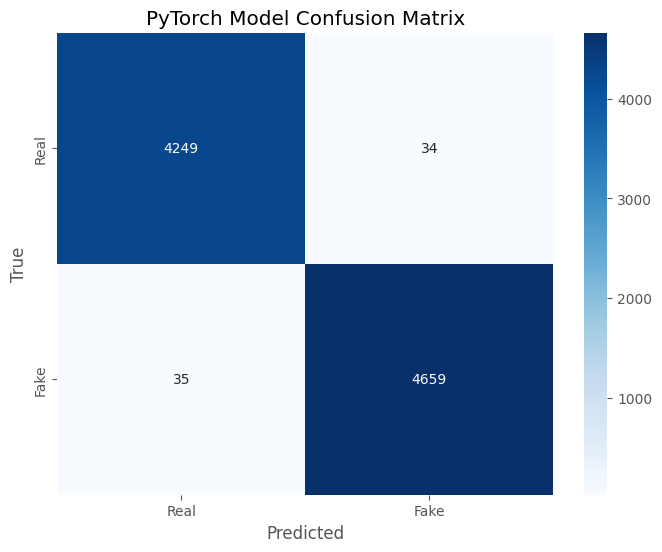

In [ ]:
%pip install torch
import os
import sys
import subprocess
import pandas as pd
import re
import string
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

# Download NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def install_packages():
    required_packages = [
        ('pandas', 'pandas'),
        ('nltk', 'nltk'),
        ('sklearn', 'scikit-learn'),
        ('seaborn', 'seaborn'),
        ('xgboost', 'xgboost'),
        ('torch', 'torch')
    ]
    print("\n Checking and installing required packages...")
    for import_name, package_name in required_packages:
        try:
            __import__(import_name)
            print(f"✓ {import_name} is already installed")
        except ImportError:
            print(f" Installing {package_name}...")
            try:
                subprocess.run([sys.executable, "-m", "pip", "install", package_name], check=True)
                print(f"✓ {package_name} installed successfully")
            except subprocess.CalledProcessError:
                print(f" Failed to install {package_name}")
    print("\n Please RESTART YOUR KERNEL after installation")

def load_data(filepath):
    try:
        print(f"\n Loading dataset from: {filepath}")
        df = pd.read_csv(filepath)
        df['text'] = df['text'].astype(str)
        print(f"• Total records: {len(df):,}")
        return df
    except FileNotFoundError:
        print(f"\n Error: File not found at {filepath}")
        exit()

def preprocess_text(text, stop_words, lemmatizer):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    words = [w for w in text.split() if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n{'='*50}\n Evaluating {model_name}\n{'='*50}")
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Accuracy: {acc:.4f}")
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_pytorch_model(model, data_loader, device, y_test):
    model.eval()
    with torch.no_grad():
        all_preds = []
        for batch in data_loader:
            inputs = batch[0].to(device)
            outputs = model(inputs)
            preds = torch.round(torch.sigmoid(outputs)).cpu().numpy()
            all_preds.extend(preds)
    acc = accuracy_score(y_test, all_preds)
    print(f"\n Accuracy: {acc:.4f}")
    print("\n Classification Report:")
    print(classification_report(y_test, all_preds, digits=4))
    cm = confusion_matrix(y_test, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'PyTorch Model Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

class FakeNewsClassifier(nn.Module):
    def __init__(self, input_size):
        super(FakeNewsClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.fc(x).squeeze()

def main():
    print("\n" + "="*50)
    print(" Fake News Detection System with PyTorch")
    print("="*50)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filepath = 'C:/Users/Abdelrahman Ahmed/Downloads/fake_real_news.csv'
    df = load_data(filepath)

    label_cols = ['label', 'is_fake', 'fake', 'target']
    label_column = next((col for col in label_cols if col in df.columns), None)
    if not label_column:
        print("Enter label column name: ")
        label_column = input()
    df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
    df['label'] = df[label_column]
    df['cleaned_content'] = df['content'].apply(lambda x: preprocess_text(x, stop_words, lemmatizer))
    df = df[df['cleaned_content'].str.split().str.len() > 5]

    X_train, X_test, y_train, y_test = train_test_split(
        df['cleaned_content'], 
        df['label'], 
        test_size=0.2, 
        random_state=42,
        stratify=df['label']
    )

    vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    grid_lr = GridSearchCV(
        LogisticRegression(max_iter=1000), 
        {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'class_weight': [None, 'balanced']}, 
        cv=3, n_jobs=-1
    )
    grid_lr.fit(X_train_tfidf, y_train)
    evaluate_model(grid_lr.best_estimator_, X_test_tfidf, y_test, "Logistic Regression")

    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    rf.fit(X_train_tfidf, y_train)
    evaluate_model(rf, X_test_tfidf, y_test, "Random Forest")

    try:
        from xgboost import XGBClassifier
        xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
        xgb.fit(X_train_tfidf, y_train)
        evaluate_model(xgb, X_test_tfidf, y_test, "XGBoost")
    except ImportError:
        print("XGBoost not installed. Skipping...")

    print("\n" + "-"*40)
    print(" Training Deep Learning Model with PyTorch")
    print("-"*40)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train_tensor = torch.FloatTensor(X_train_tfidf.toarray())
    X_test_tensor = torch.FloatTensor(X_test_tfidf.toarray())
    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(y_test.values)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

    model = FakeNewsClassifier(input_size=X_train_tfidf.shape[1]).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print("Training started...")
    for epoch in range(5):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1} Loss: {total_loss:.4f}")

    evaluate_pytorch_model(model, test_loader, device, y_test_tensor.numpy())

if __name__ == "__main__":
    if 'google.colab' not in sys.modules:
        install_packages()
    main()
